### Python module/package imports for this chapter

In [2]:
import math, json, collections, itertools

In [3]:
import numpy as np
import matplotlib.pyplot as pp
%matplotlib inline

In [4]:
# from mpl_toolkits.basemap import Basemap
# import geopy

**March 2020 update**:

* at 06:07 in the video: beginning in Python 3.6 for the standard CPython implementation of the language, and in Python 3.7 for the core language, the standard `dict` objects preserve the insertion order, so there's no need for `collections.OrderedDict()`; correspondingly, the dict comprehension shown at 06:34 is generated with the same order as the `OrderedDict`.

## Beyond lists, dicts, and sets: more powerful collections

In [8]:
open('goldmedals.txt', 'r').readlines()[:10]

['1896\tThomas Burke\tUSA\t100m men\n',
 '1896\tThomas Curtis\tUSA\t110m hurdles men\n',
 '1896\tEdwin Flack\tAUS\t1500m men\n',
 '1896\tThomas Burke\tUSA\t400m men\n',
 '1896\tEdwin Flack\tAUS\t800m men\n',
 '1896\tRobert Garrett\tUSA\tdiscus throw men\n',
 '1896\tEllery Clark\tUSA\thigh jump men\n',
 '1896\tEllery Clark\tUSA\tlong jump men\n',
 '1896\tSpyridon Louis\tGRE\tmarathon men\n',
 '1896\tWilliam Welles Hoyt\tUSA\tpole vault men\n']

Namedtuple: dict :: tuple:list - immutable entries

In [12]:
#creates a namedtuple class called medal with the elements in dict as elements 
# and instantiates a medal based on that class
medal1 = collections.namedtuple('medal',['year', 'athlete', 'team', 'event'])
m = medal1('1983', 'john wayne', 'USA', '100m')

In [15]:
print(m)

medal(year='1983', athlete='john wayne', team='USA', event='100m')


In [13]:
medal_det = [medal1(*line.strip('\n').split('\t'))for line in open('goldmedals.txt','r')]

In [14]:
medal_det[:10]

[medal(year='1896', athlete='Thomas Burke', team='USA', event='100m men'),
 medal(year='1896', athlete='Thomas Curtis', team='USA', event='110m hurdles men'),
 medal(year='1896', athlete='Edwin Flack', team='AUS', event='1500m men'),
 medal(year='1896', athlete='Thomas Burke', team='USA', event='400m men'),
 medal(year='1896', athlete='Edwin Flack', team='AUS', event='800m men'),
 medal(year='1896', athlete='Robert Garrett', team='USA', event='discus throw men'),
 medal(year='1896', athlete='Ellery Clark', team='USA', event='high jump men'),
 medal(year='1896', athlete='Ellery Clark', team='USA', event='long jump men'),
 medal(year='1896', athlete='Spyridon Louis', team='GRE', event='marathon men'),
 medal(year='1896', athlete='William Welles Hoyt', team='USA', event='pole vault men')]

In [15]:
medals_per_country = collections.Counter(medal.team for medal in medal_det)

In [20]:
def best_by_year(year):
    counts = collections.Counter(medal.team for medal in medal_det if medal.year == str(year))
    best = counts.most_common(5)
    
    return [b[0] for b in best], [b[1] for b in best]

best_by_year(2016)

(['USA', 'JAM', 'KEN', 'GBR', 'GER'], [30, 11, 6, 3, 2])

In [25]:
medals_per_country

Counter({'USA': 521,
         'AUS': 23,
         'GRE': 7,
         'GBR': 71,
         'CAN': 21,
         'ZZX': 5,
         'HUN': 10,
         'FRA': 14,
         'RSA': 8,
         'SWE': 21,
         'FIN': 60,
         'NOR': 7,
         'ITA': 19,
         'GER': 18,
         'POL': 27,
         'IRL': 4,
         'JPN': 7,
         'ARG': 2,
         'NZL': 10,
         'TCH': 11,
         'NED': 9,
         'JAM': 42,
         'BEL': 4,
         'AUT': 1,
         'LUX': 1,
         'URS': 79,
         'BRA': 5,
         'EUA': 7,
         'ROU': 11,
         'ETH': 22,
         'KEN': 33,
         'TUN': 1,
         'GDR': 50,
         'FRG': 15,
         'UGA': 2,
         'TRI': 2,
         'MEX': 3,
         'CUB': 10,
         'BUL': 5,
         'MAR': 6,
         'POR': 4,
         'CHN': 8,
         'ESP': 3,
         'ALG': 4,
         'EUN': 12,
         'LTU': 3,
         'KOR': 1,
         'RUS': 29,
         'ECU': 1,
         'BDI': 1,
         'SYR': 1,
       

In [26]:
medals_per_country.most_common(5)

[('USA', 521), ('URS', 79), ('GBR', 71), ('FIN', 60), ('GDR', 50)]

In [29]:
pp.style.use('ggplot')
colors = pp.cm.Set3(np.linspace(0,1,5))

def plotyear(year):    
    countries, tally = best_by_year(year)
    bars = pp.bar(np.arange(5), tally, align='center') 
    #arange returns an array of evenly spaced values

    pp.xticks(np.arange(5), countries)

    for bar, color in zip(bars, colors):
        bar.set_color(color)

    pp.title(year)


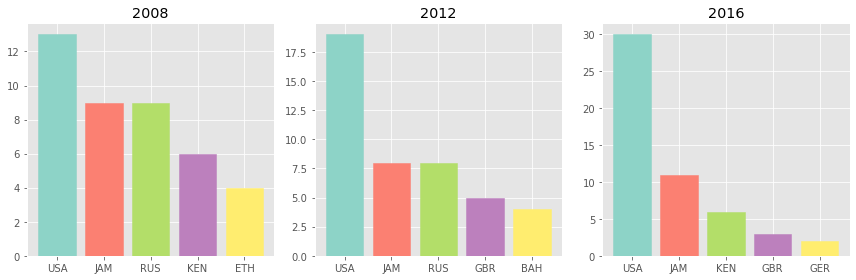

In [38]:
pp.figure(figsize=(12,4)) # length, width
pp.subplot(1,3,1); plotyear(2008) #
pp.subplot(1,3,2); plotyear(2012)
pp.subplot(1,3,3); plotyear(2016)
pp.tight_layout()

**Defaultdict** 

returns a default val if key value not found (In case of dictionary, we get key error)
def val can be a text, an empty list etc. The default value has to be a function object  
e.g. if text to be returned  
dict = collections.defaultdict(lambda: 'Default') #sets 'Default' as the default value

In [49]:
winners_by_country = collections.defaultdict(list)
  
[winners_by_country[medal.team].append(medal.athlete) for medal in medal_det]

winners_by_country

defaultdict(list,
            {'USA': ['Thomas Burke',
              'Thomas Curtis',
              'Thomas Burke',
              'Robert Garrett',
              'Ellery Clark',
              'Ellery Clark',
              'William Welles Hoyt',
              'Robert Garrett',
              'James Connolly',
              'Francis Jarvis',
              'Alvin Kraenzlein',
              'Walter B. John Tewksbury',
              'Alvin Kraenzlein',
              'Maxwell W.Maxey Long',
              'Walter B. John Tewksbury',
              'Alvin Kraenzlein',
              'John Jesus Flanagan',
              'Irving Baxter',
              'Ray Ewry',
              'Alvin Kraenzlein',
              'Ray Ewry',
              'Irving Baxter',
              'Richard Sheldon',
              'Meyer Prinstein',
              'Ray Ewry',
              'Archie Hahn',
              'Frederick Schule',
              'James Lightbody',
              'Archie Hahn',
              'Harry Hillman',
  

In [50]:
winners_by_country1 = collections.defaultdict(list)

for medal in medal_det:
    winners_by_country1[medal.team].append(medal.athlete)

winners_by_country1

defaultdict(list,
            {'USA': ['Thomas Burke',
              'Thomas Curtis',
              'Thomas Burke',
              'Robert Garrett',
              'Ellery Clark',
              'Ellery Clark',
              'William Welles Hoyt',
              'Robert Garrett',
              'James Connolly',
              'Francis Jarvis',
              'Alvin Kraenzlein',
              'Walter B. John Tewksbury',
              'Alvin Kraenzlein',
              'Maxwell W.Maxey Long',
              'Walter B. John Tewksbury',
              'Alvin Kraenzlein',
              'John Jesus Flanagan',
              'Irving Baxter',
              'Ray Ewry',
              'Alvin Kraenzlein',
              'Ray Ewry',
              'Irving Baxter',
              'Richard Sheldon',
              'Meyer Prinstein',
              'Ray Ewry',
              'Archie Hahn',
              'Frederick Schule',
              'James Lightbody',
              'Archie Hahn',
              'Harry Hillman',
  

In [59]:
ordered_winners = collections.OrderedDict()

for medal in medal_det:
    if medal.team == 'ITA':
        ordered_winners[medal.athlete] = medal.year + " " + medal.event 

ordered_winners

OrderedDict([('Ugo Frigerio', '1924 10000m walk men'),
             ('Luigi Beccali', '1932 1500m men'),
             ('Trebisonda Valla', '1936 80m hurdles women'),
             ('Adolfo Consolini', '1948 discus throw men'),
             ('Giuseppe Dordoni', '1952 50km walk men'),
             ('Livio Berruti', '1960 200m men'),
             ('Abdon Pamich', '1964 50km walk men'),
             ('Pietro Mennea', '1980 200m men'),
             ('Maurizio Damilano', '1980 20km walk men'),
             ('Sara Simeoni', '1980 high jump women'),
             ('Alberto Cova', '1984 10000m men'),
             ('Gabriella Dorio', '1984 1500m women'),
             ('Alessandro Andrei', '1984 shot put men'),
             ('Gelindo Bordin', '1988 marathon men'),
             ('Ivano Brugnetti', '2004 20km walk men'),
             ('Stefano Baldini', '2004 marathon men'),
             ('Alex Schwazer', '2008 50km walk men')])

**Deque**:

Double ended queue. Can be appended or popped from both sides

Supports insertions in O(1) for list of any length

In [65]:
dq = collections.deque(range(10))

for i in range(10,15):
    dq.appendleft(i); dq.pop()
    print(dq)
    
for i in range(0,5):
    dq.append(i); dq.popleft()
    print(dq)


deque([10, 0, 1, 2, 3, 4, 5, 6, 7, 8])
deque([11, 10, 0, 1, 2, 3, 4, 5, 6, 7])
deque([12, 11, 10, 0, 1, 2, 3, 4, 5, 6])
deque([13, 12, 11, 10, 0, 1, 2, 3, 4, 5])
deque([14, 13, 12, 11, 10, 0, 1, 2, 3, 4])
deque([13, 12, 11, 10, 0, 1, 2, 3, 4, 0])
deque([12, 11, 10, 0, 1, 2, 3, 4, 0, 1])
deque([11, 10, 0, 1, 2, 3, 4, 0, 1, 2])
deque([10, 0, 1, 2, 3, 4, 0, 1, 2, 3])
deque([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
